In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import packages we will use for importing and extracting information fromsound files

In [3]:
import librosa as lr
from glob import glob

In [64]:
#read the csv file which contains informatiion about the audio files
data_df=pd.read_csv('set_a.csv')
data_df.head()

,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


In [65]:
data_df.isna().sum()

dataset       0
fname         0
label        52
sublabel    176
dtype: int64

In [66]:
#we should also drop the column sublabel because it doesnot have any input
data_df=data_df.drop(labels='sublabel', axis=1)
# rows with missing value doesnot contain any important information, we should drop them
data_df=data_df.dropna(axis=0)

In [67]:
data_df.isna().sum()

dataset    0
fname      0
label      0
dtype: int64

## Import Audio files into workspcae using the glob package

In [68]:
audio_files=glob('set_a/*.wav')

In [69]:
# Read the first audio file and plot it
audio, sfreq= lr.load(audio_files[0])
# The frequency of Audio file [0] is
print(sfreq)

22050


In [70]:
print(audio_files[0])

set_a\artifact__201012172012.wav


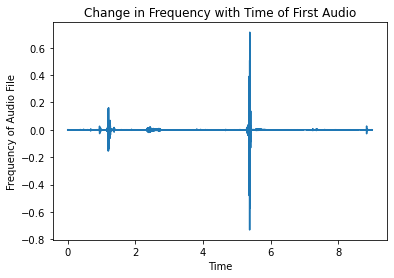

In [71]:
# Create the time range for plotting the frequency
time=np.arange(0,len(audio))/sfreq
# plot the frequency
plt.plot(time, audio)
plt.xlabel("Time")
plt.ylabel("Frequency of Audio File")
plt.title("Change in Frequency with Time of First Audio")
plt.savefig("first.png", dpi=300)
plt.show()

In [35]:
data_df['sfreq']=""

In [77]:
for i in range(len(audio_files)):
    audio, sfreq =lr.load(audio_files[i])
    data_df.loc[data_df['fname']==audio_files[i].replace('\\','/'), 'sfreq']=sfreq

In [78]:
data_df.head()

,dataset,fname,label,sfreq
0,a,set_a/artifact__201012172012.wav,artifact,22050.0
1,a,set_a/artifact__201105040918.wav,artifact,22050.0
2,a,set_a/artifact__201105041959.wav,artifact,22050.0
3,a,set_a/artifact__201105051017.wav,artifact,22050.0
4,a,set_a/artifact__201105060108.wav,artifact,22050.0
